## Intro to Linear Models

The simplest type of machine learning involves predicting the value of a single variable (the **output feature/label/value**) using the value of another single variable (the **input feature**).

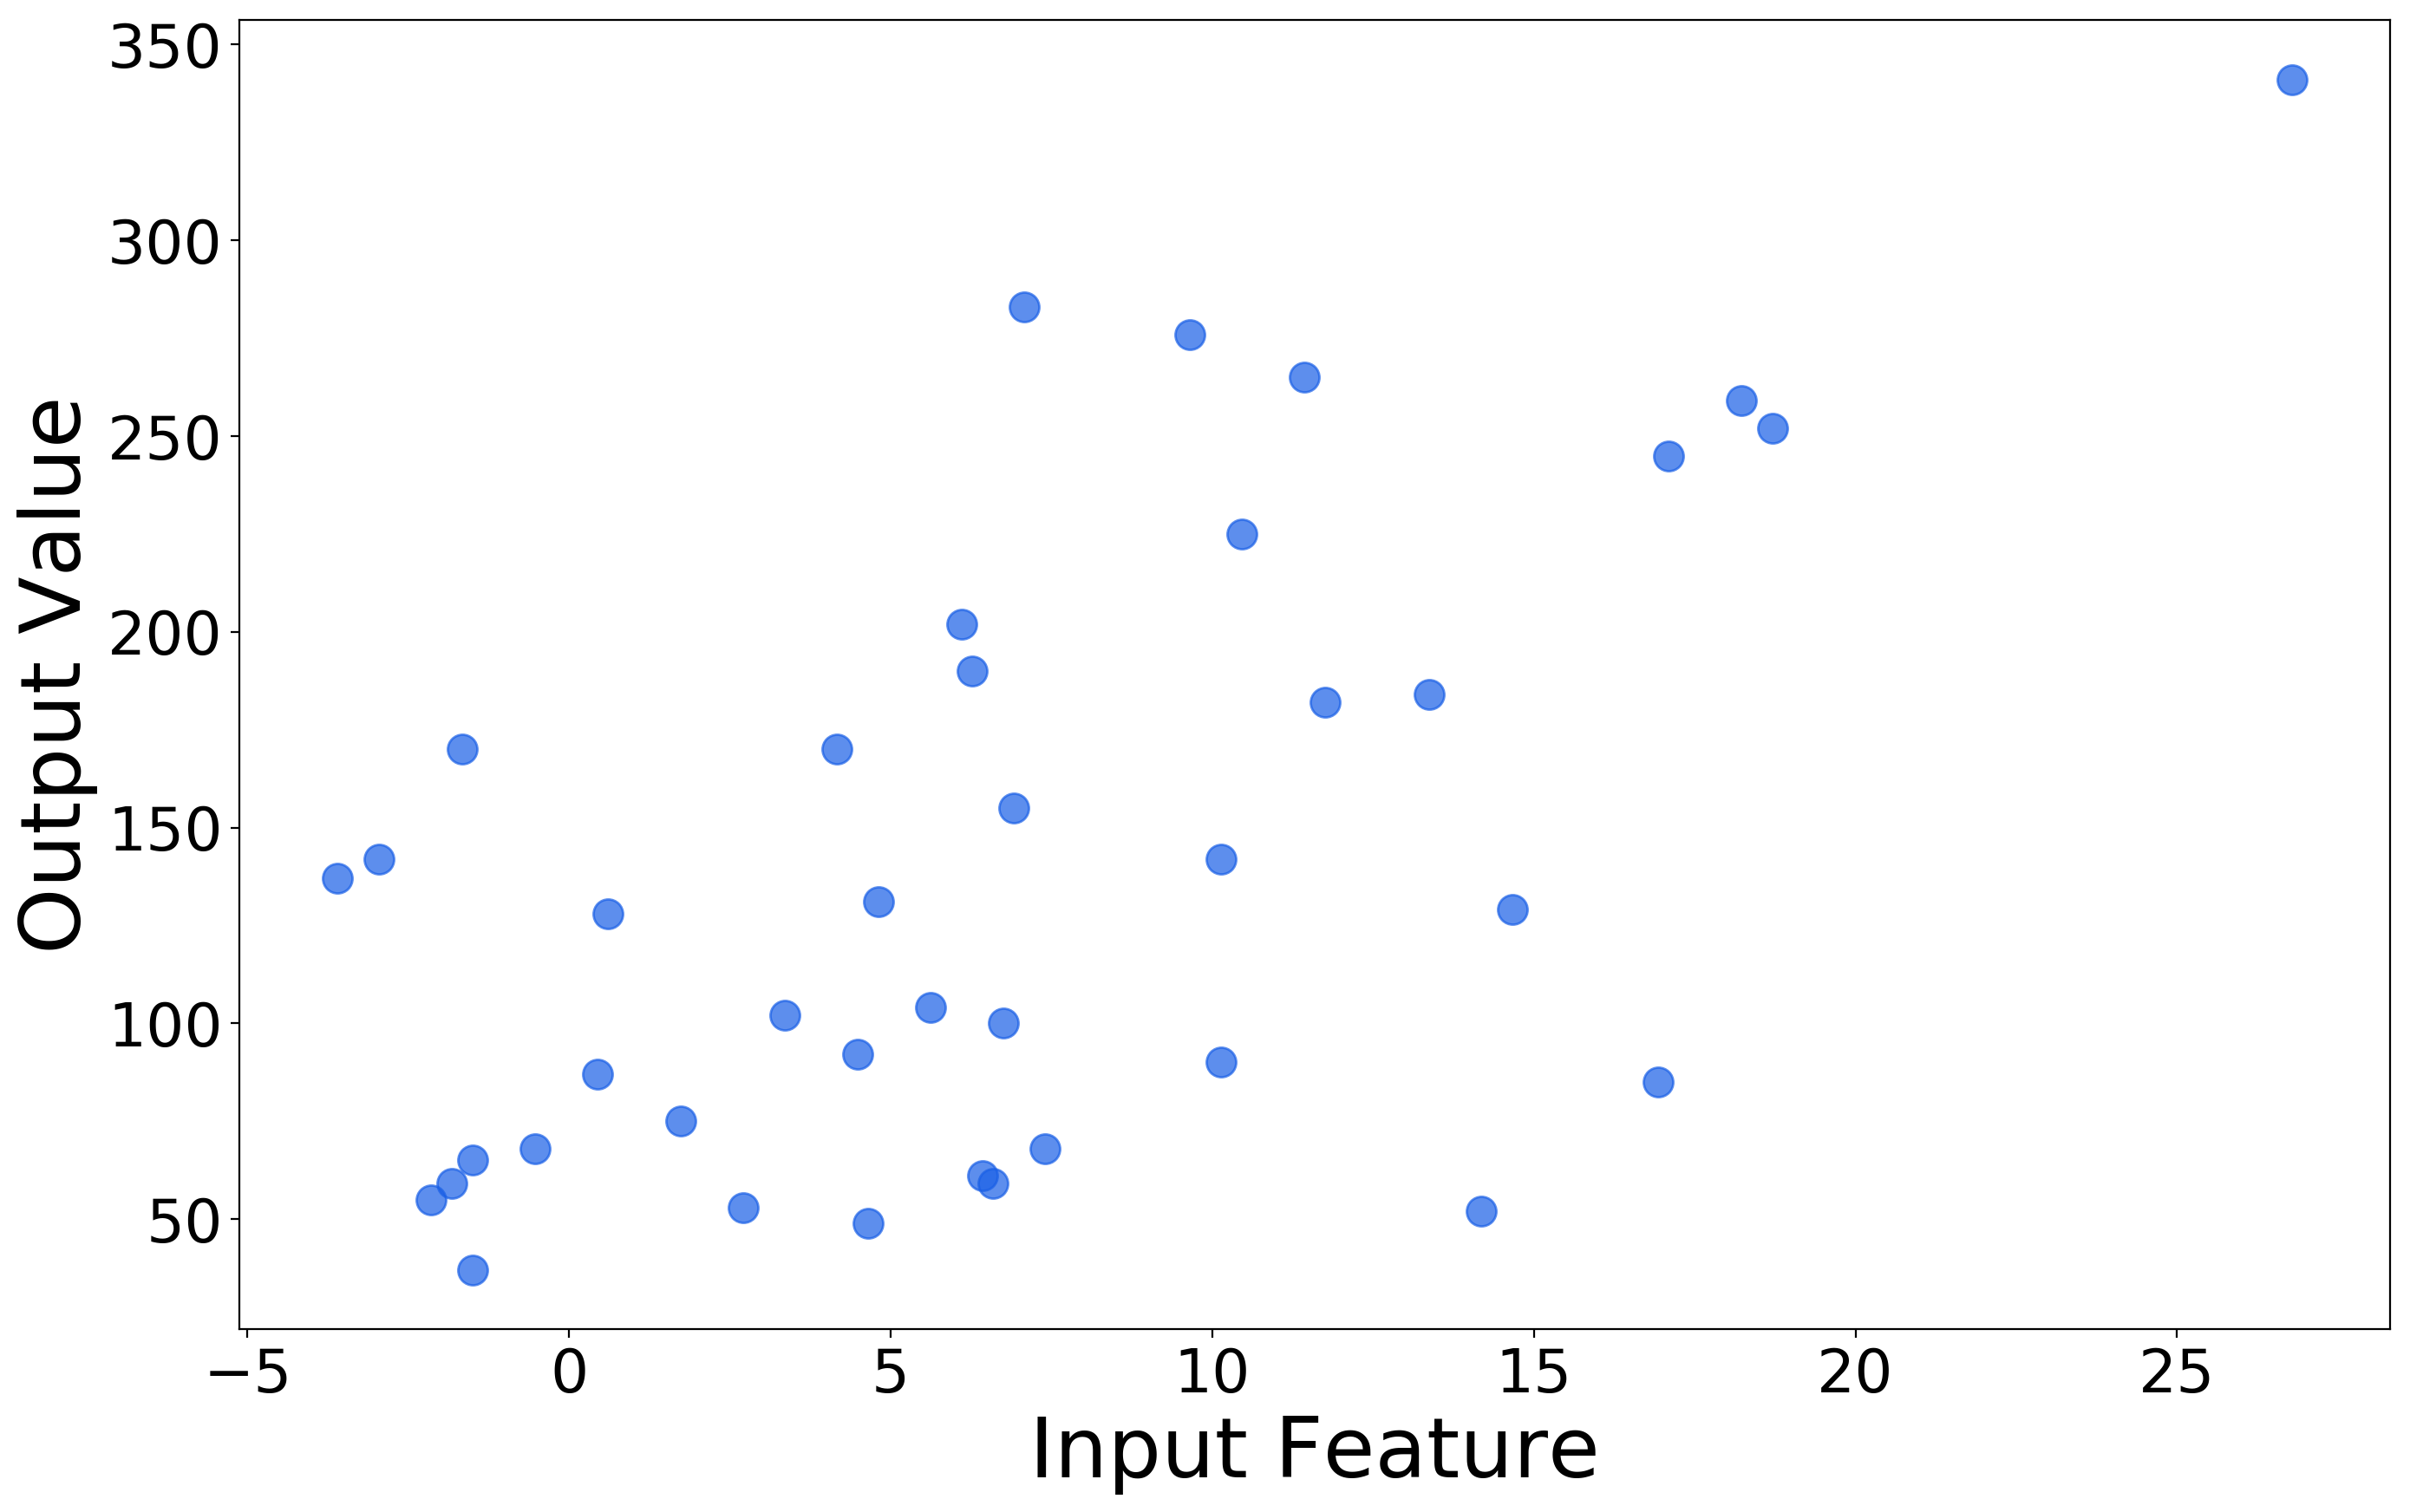

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets

# set plot attributes
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] = 16, 10

# set colours for use in plotting
plt_clrs = sns.hls_palette(10, l=.5, s=.8)
plt_clrs2 = sns.light_palette('0.05')

# load a random subset of a the diabetes dataset and rescale it
diabetes_data = datasets.load_diabetes()
input_feats = (diabetes_data.data[20:60, 2] * 150 + 8).reshape(-1, 1)
out_feats = diabetes_data.target[20:60].reshape(-1, 1)

# plot the data
plt.scatter(input_feats, out_feats,
            color=plt_clrs[6], s=150, alpha=0.7)

# set axis label attributes
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Input Feature', fontsize=35)
plt.ylabel('Output Value', fontsize=35)

plt.show()


One of the simplest mathematical ways of describing the relationship between these two variables is using a **linear model**. This model assigns a **coefficient** to each of the input features, as well as an intercept term, to produce a linear equation that (hopefully) approximates the output values.

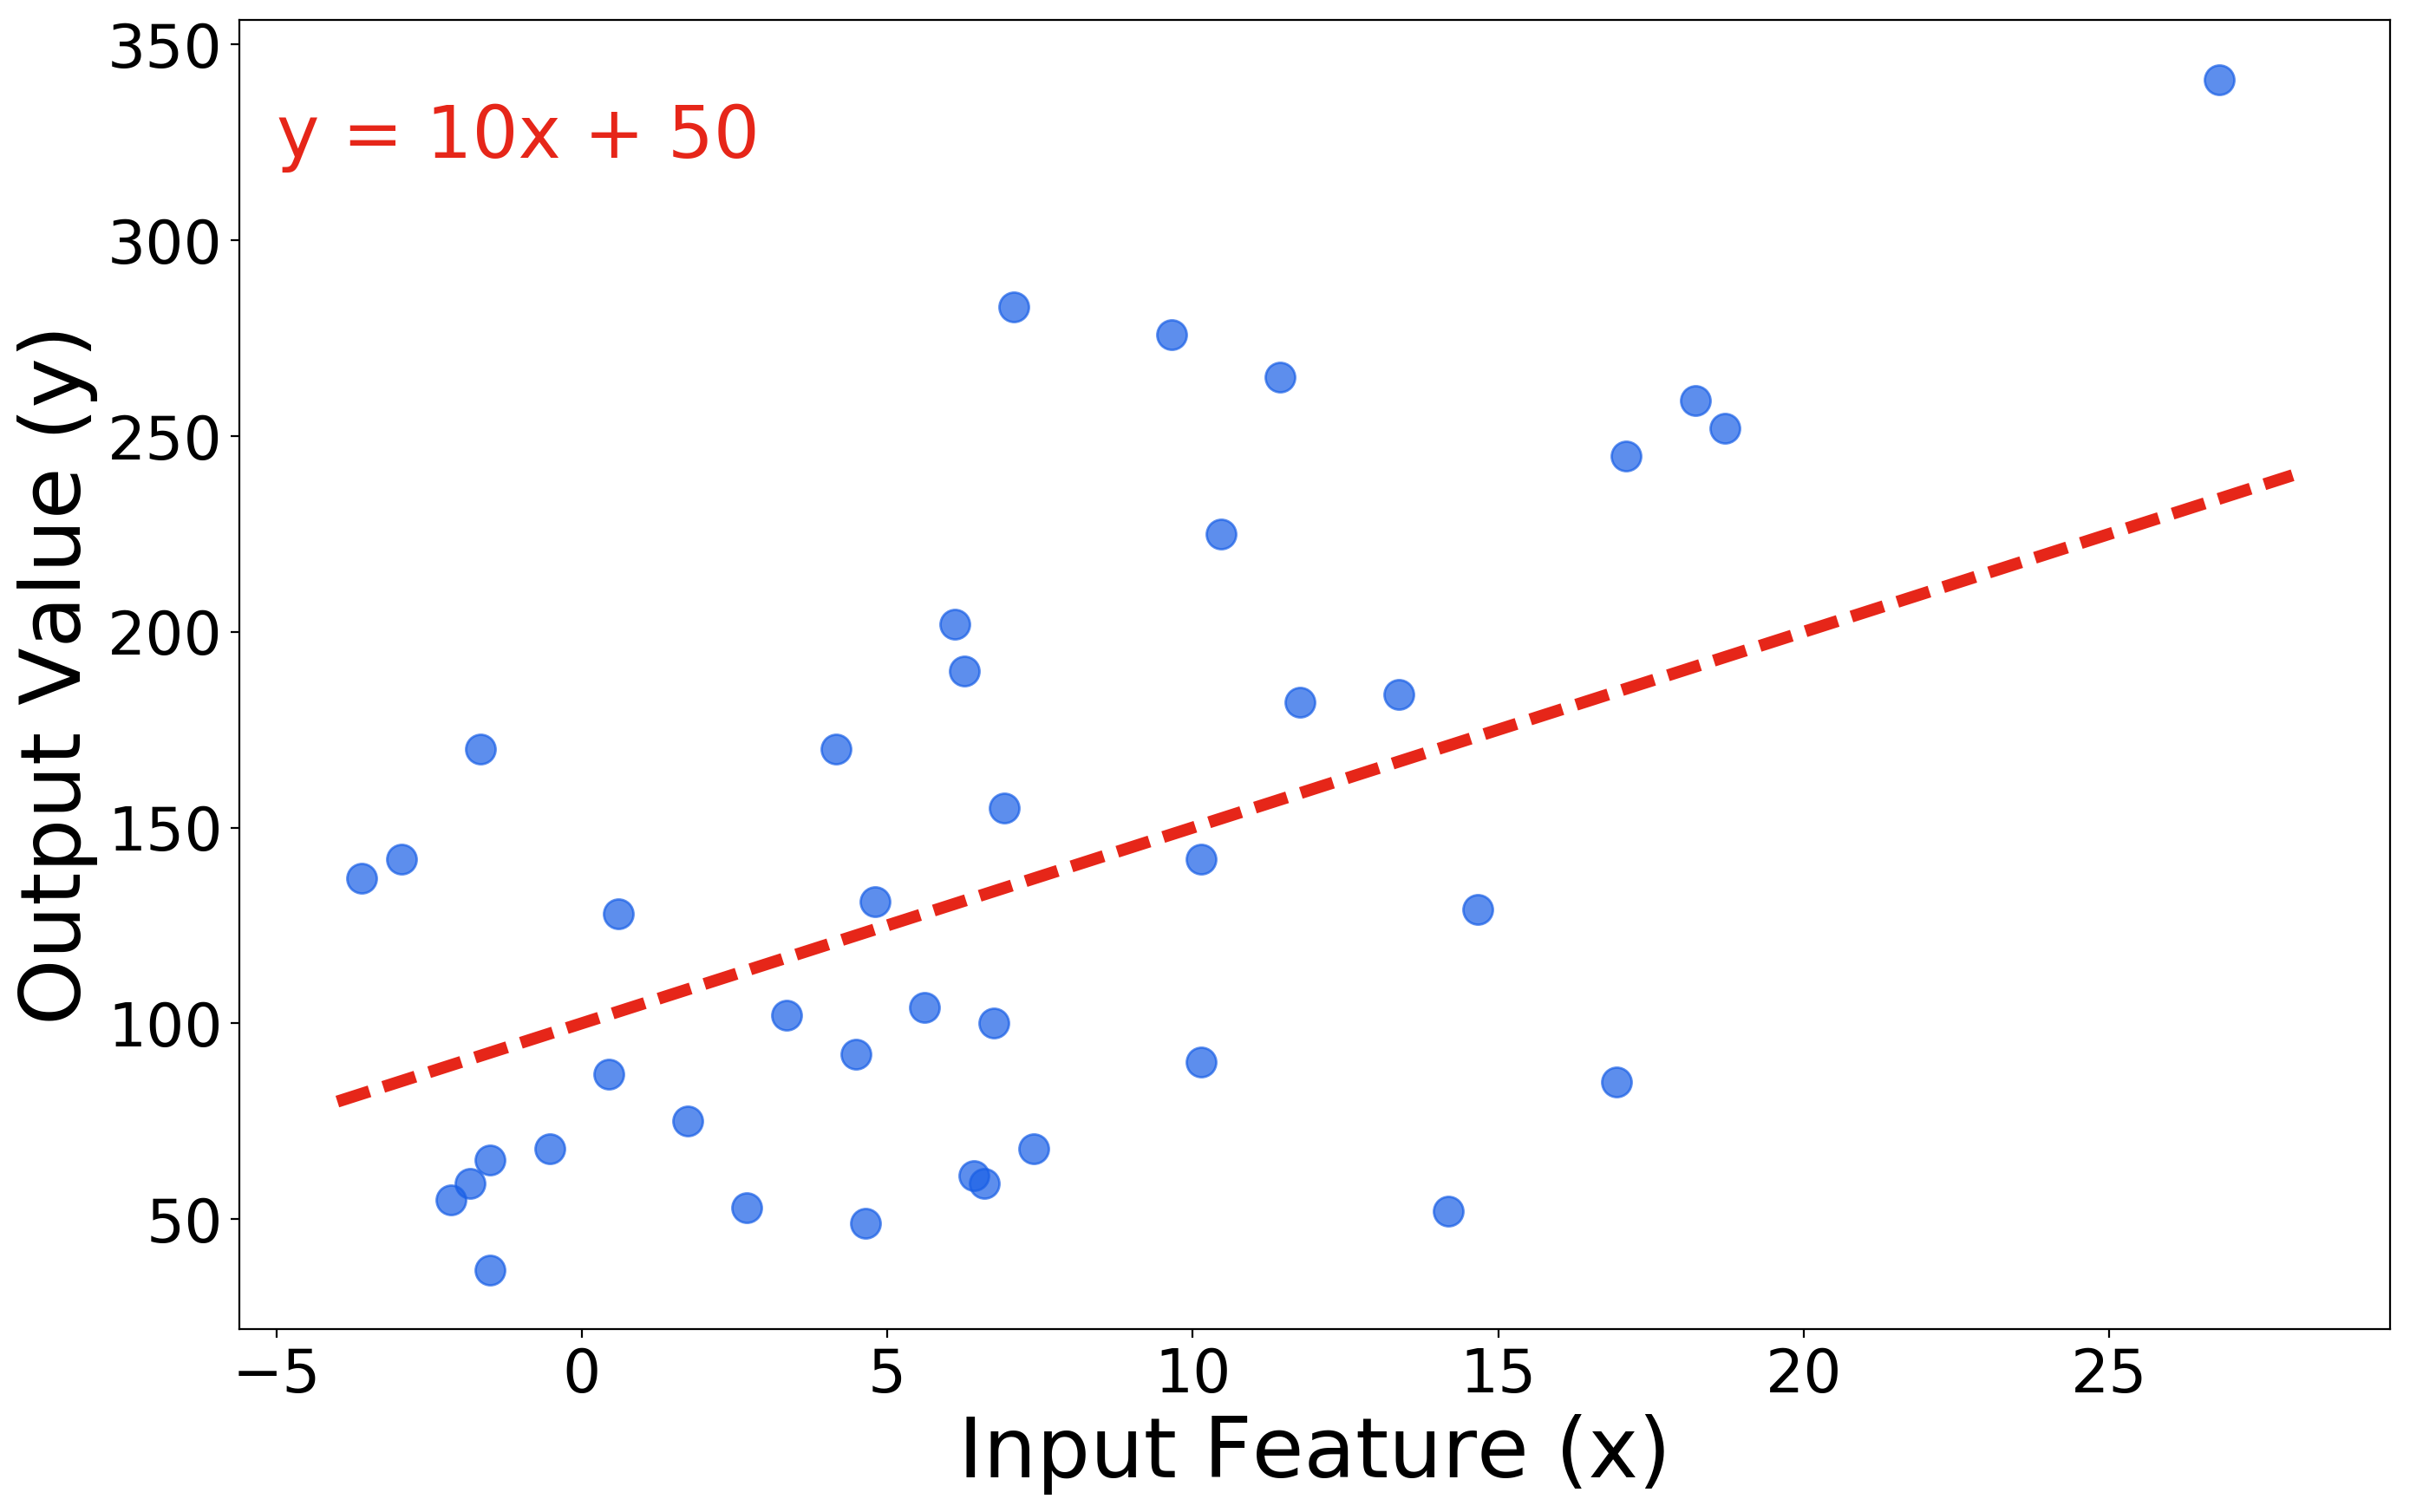

In [2]:
import numpy as np

# set plot attributes
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] = 16, 10

# plot the data
plt.scatter(input_feats, out_feats,
            color=plt_clrs[6], s=150, alpha=0.7)

# plot a line
x_vals = np.arange(-4, 29)
y_vals = x_vals * 5 + 100
plt.plot(x_vals, y_vals,
         color=plt_clrs[0], linewidth=5, linestyle='--')

# annotate the line
plt.text(s='y = 10x + 50', x=-5, y=321,
         size=30, color=plt_clrs[0])

# set axis label attributes
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Input Feature (x)', fontsize=35)
plt.ylabel('Output Value (y)', fontsize=35)

plt.show()


How do we find the best linear model for our data? This is where **linear regression** comes in. One way to choose a "best" model is to find the set of coefficients that will minimize the total distance of the output feature from the fitted line. This is called **ordinary least squares (OLS) regression**.

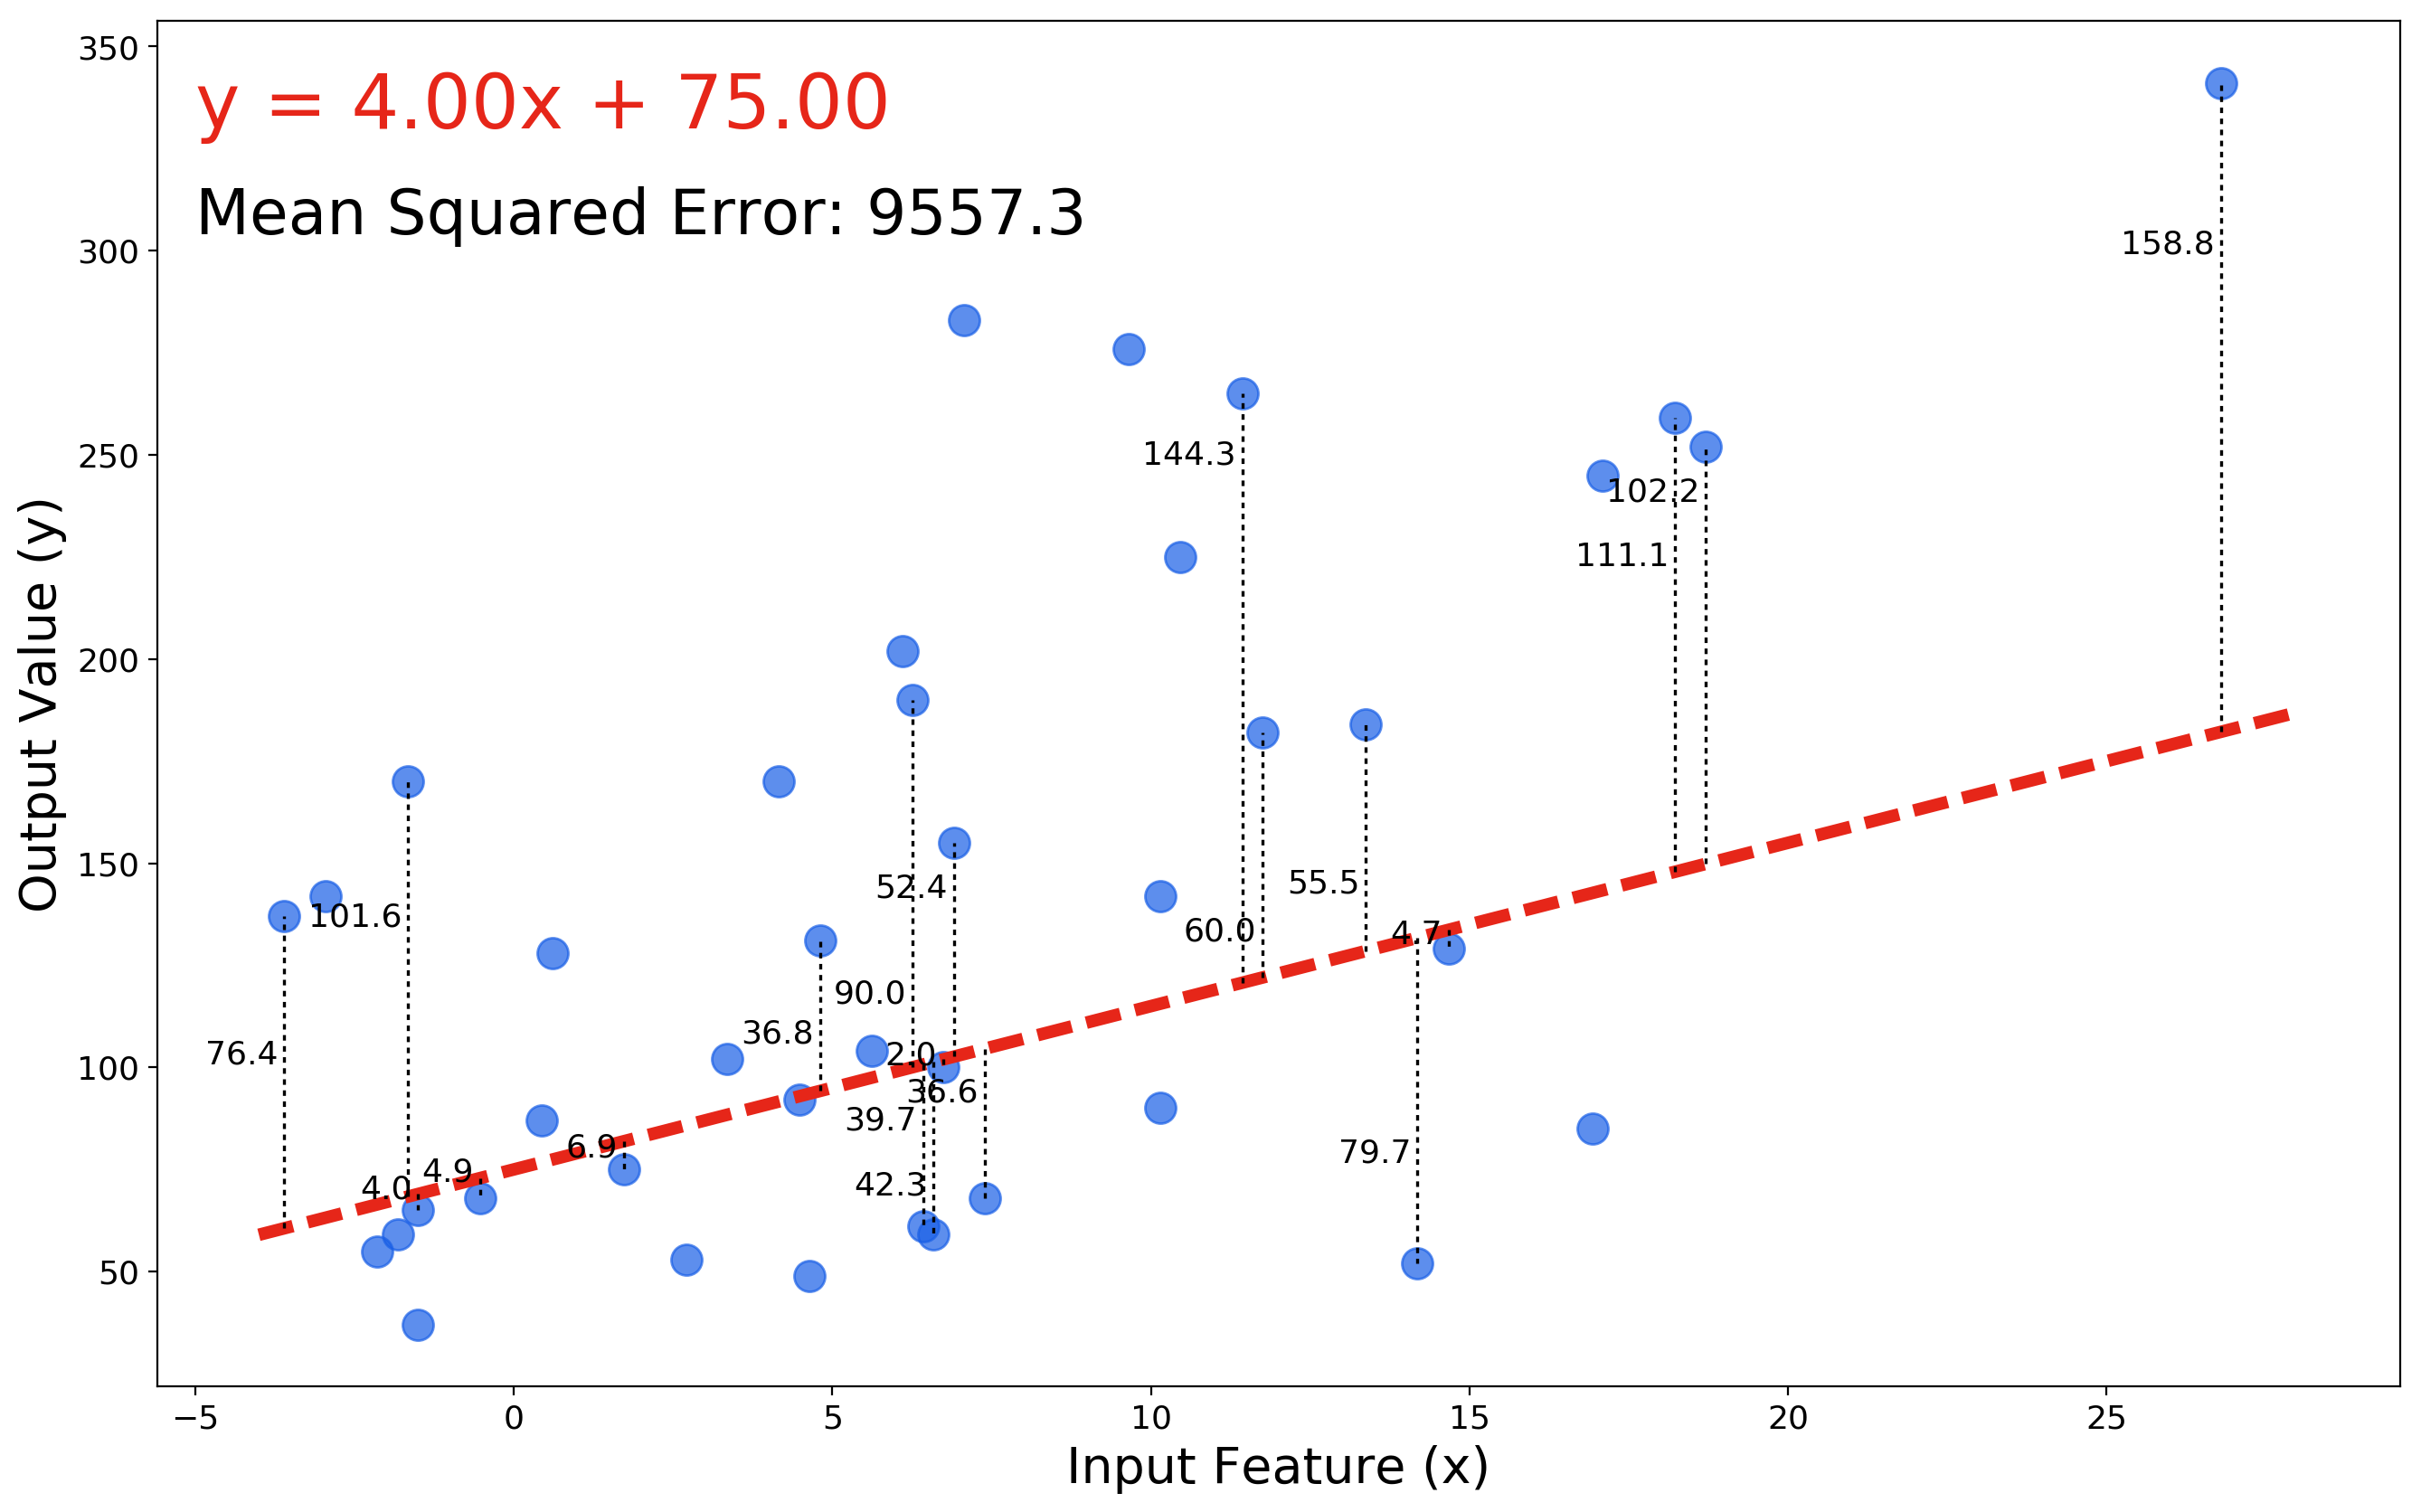

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random

# create linear regression object, train the model on the data, extract
# the model's coefficients
regr = linear_model.LinearRegression()
regr.fit(input_feats, out_feats)
regr_coefs = [regr.coef_[0][0], regr.intercept_[0]]
regr_coefs = [4, 75]

# plot the data
plt.scatter(input_feats, out_feats,
            color=plt_clrs[6], s=150, alpha=0.7)

# plot the line of best fit found by the model
x_vals = np.arange(-4, 29)
y_vals = regr_coefs[0] * x_vals + regr_coefs[1]
plt.plot(x_vals, y_vals,
         color=plt_clrs[0], linewidth=5, linestyle='--')

# annotate the plot with the characteristics of the fitted model
plt.text(s='y = {:.2f}x + {:.2f}'.format(*regr_coefs),
         x=-5, y=330, size=30, color=plt_clrs[0])
plt.text(
    s='Mean Squared Error: {:.1f}'.format(
        mean_squared_error(input_feats, regr_coefs[0] * input_feats + regr_coefs[1])),
    x=-5, y=304, size=25, color='black'
    )

# draw representations of the model's error
for i, (x_i, y_i) in enumerate(zip(input_feats, out_feats)):
    if i % 2 == 0:
        pred_y = regr_coefs[0] * x_i + regr_coefs[1]
    
        plt.plot([x_i, x_i], [pred_y, y_i],
                 color='black', linewidth=1.2, linestyle=':')
        
        plt.text(s='{:.1f}'.format(abs(y_i - pred_y)[0]),
                 x=x_i - 0.1, y=random.triangular(pred_y, y_i),
                 size=13, color='black', horizontalalignment='right')

# set axis label attributes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Input Feature (x)', fontsize=20)
plt.ylabel('Output Value (y)', fontsize=20)

plt.show()


It turns out that when we have just one input variable and one output variable, we can always derive the solution to the OLS model using closed-form formulae. This is also (usually) true when we have more than one input variable. Thus we can almost always find the line of best fit using our linear model, which becomes a plane of best fit with multiple input variables.

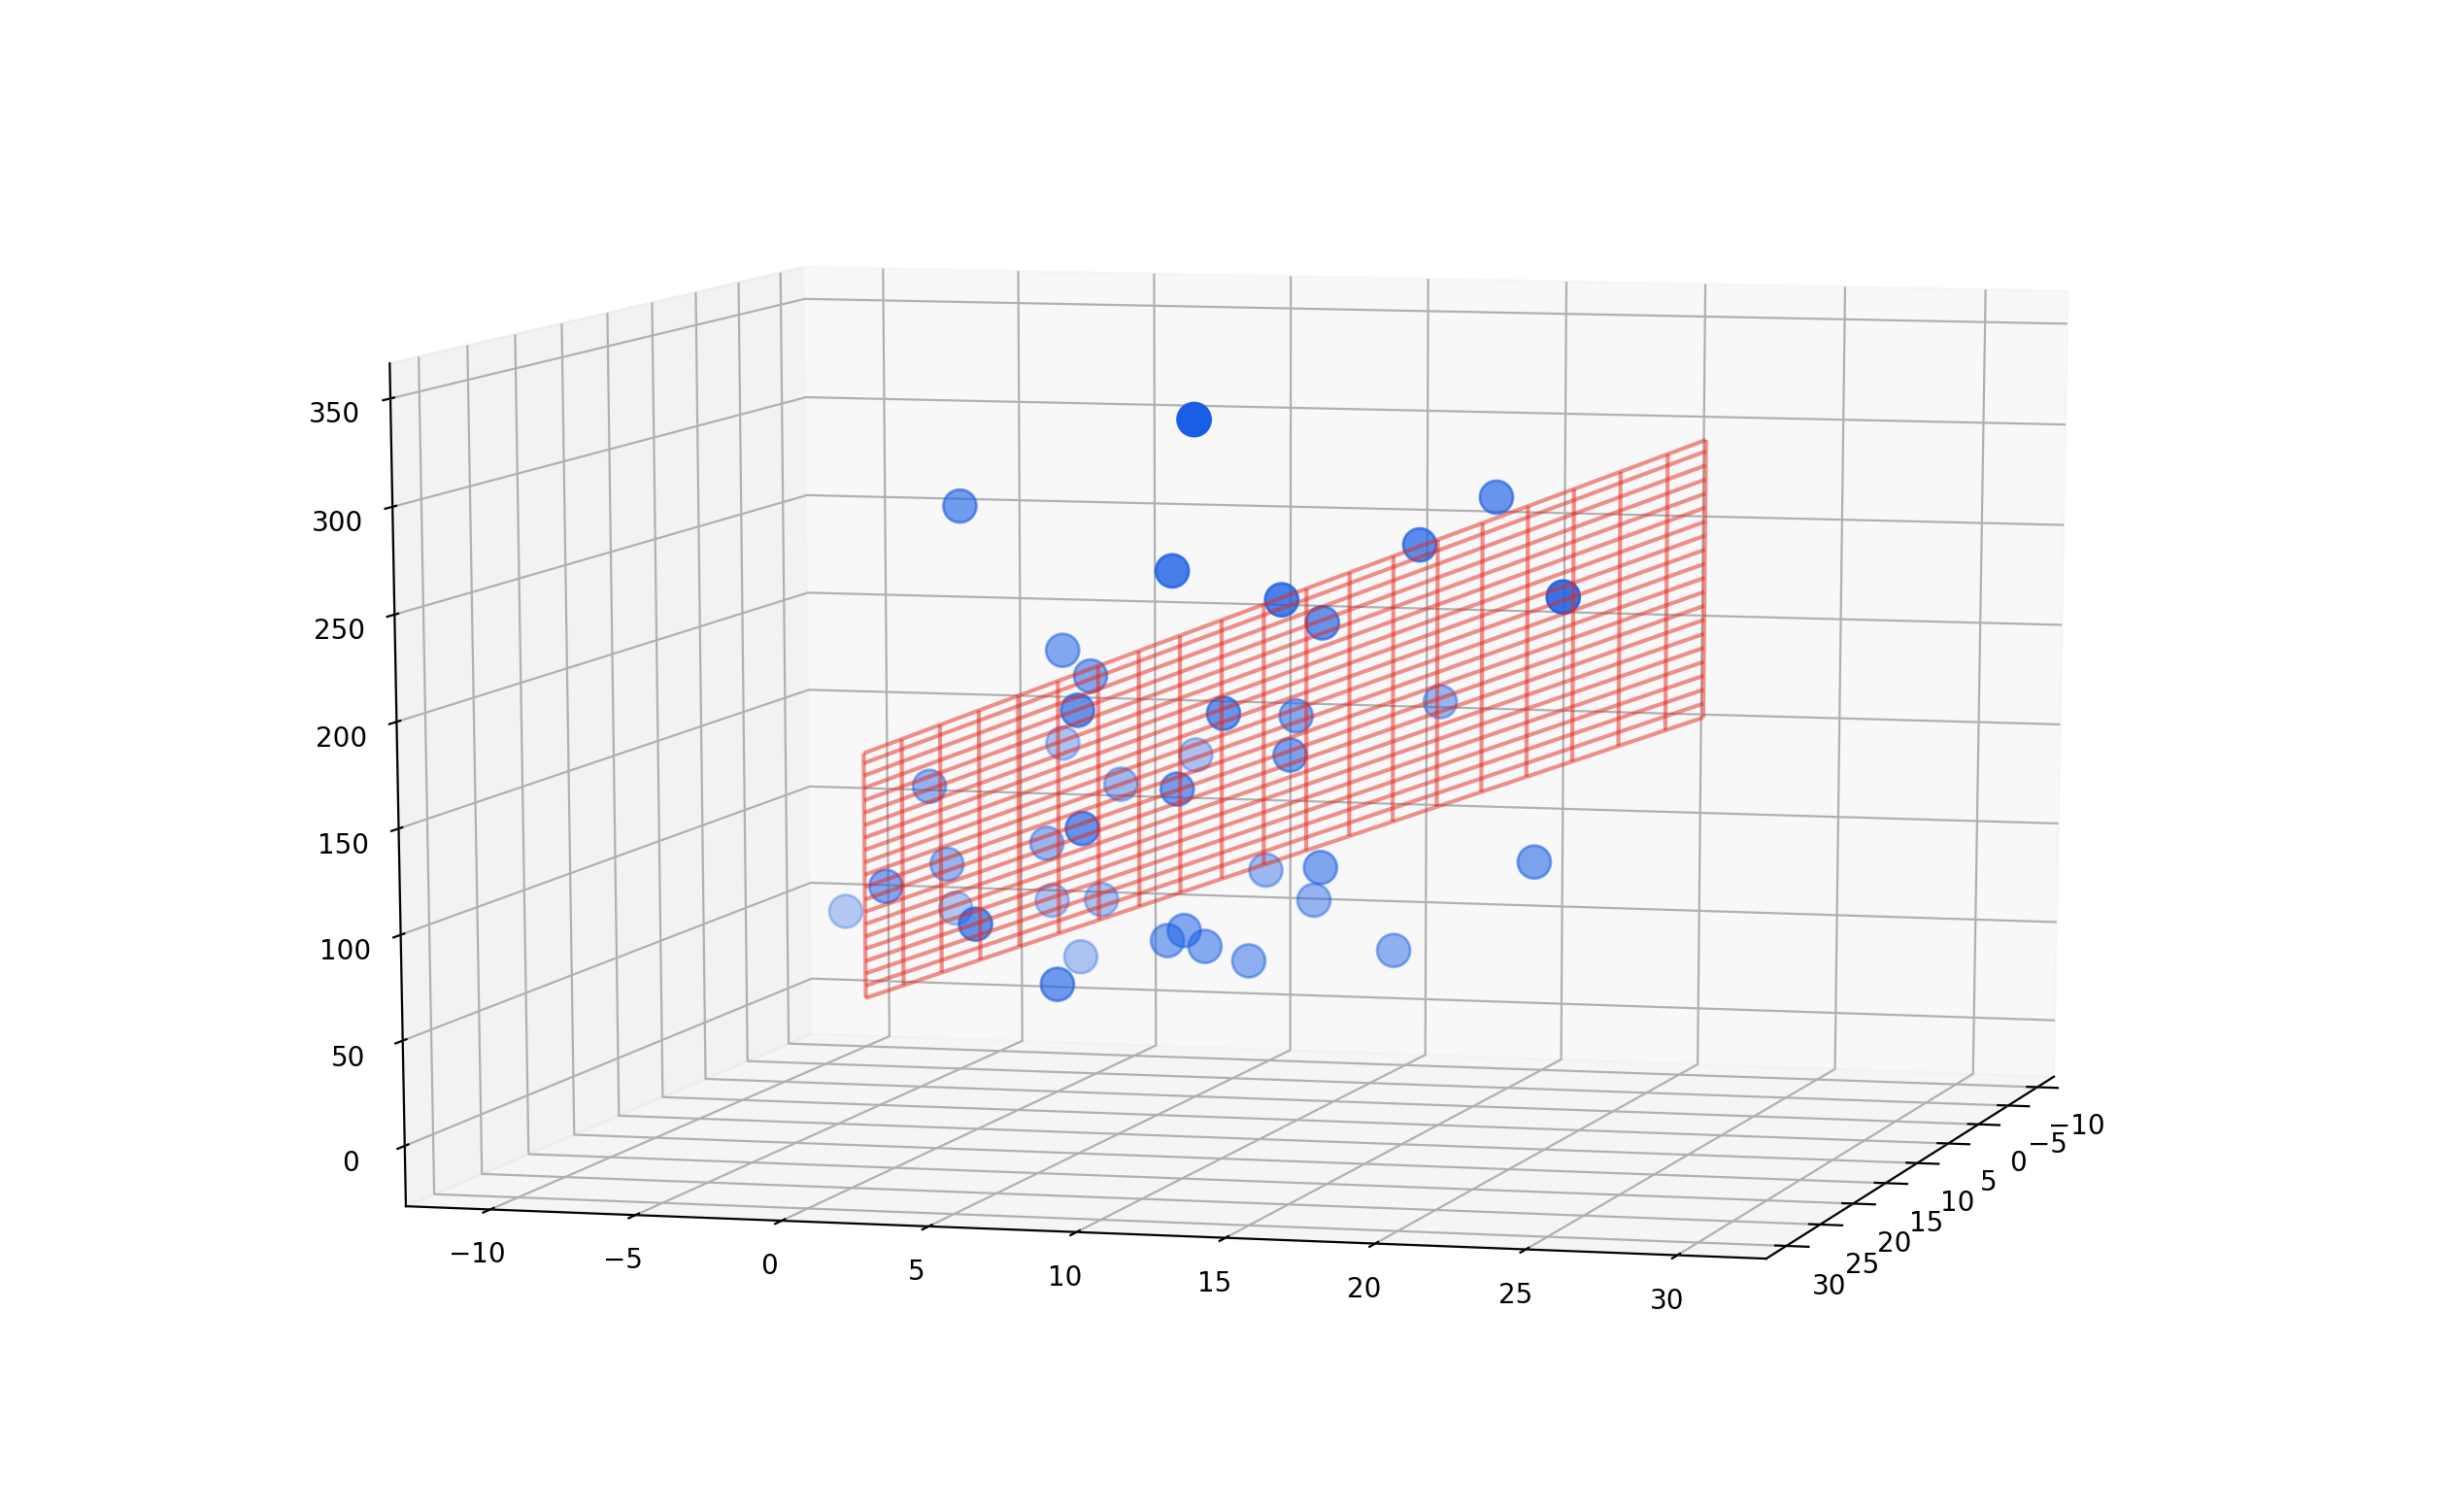

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# create a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 15)

# get a pair of input features, plot the data
input_feats = (diabetes_data.data[20:60, 2:4] * 150 + 8)
ax.scatter(input_feats[:, 0].reshape(-1, 1), input_feats[:, 1].reshape(-1, 1), out_feats,
           c=plt_clrs[6], s=150)

# fit the linear model, extract the coefficients
regr.fit(input_feats, out_feats)
regr_coefs = [regr.coef_[0][0], regr.coef_[0][1], regr.intercept_[0]]

# get the co-ordinates of the plane of best fit
x_vals = np.linspace(-10, 30, 100)
y_vals = np.linspace(-10, 30, 100)
xx, yy = np.meshgrid(x_vals, y_vals, sparse=True)

# plot the plane of best fit
z_vals = xx * regr_coefs[0] + yy * regr_coefs[1] + regr_coefs[2]
ax.plot_wireframe(x_vals, y_vals, z_vals,
                  color=plt_clrs[0], alpha=0.5, rcount=20, ccount=20)

plt.show()


So we are done, right? We have a model to describe our data, and a way to solve it!

However, OLS has a major flaw: **over-fitting**.

Clearly, visualizing the solution to linear models becomes more difficult with more than one input feature, so from now on we will use matrix notation to describe our models:

$
\LARGE
\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m}
\end{pmatrix} = 
\begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{m,1} & x_{m,2} & \cdots & x_{m,n} 
\end{pmatrix}
\begin{pmatrix}
    c_{1} \\
    c_{2} \\
    \vdots \\
    c_{m}
\end{pmatrix}
$

$
\Huge
y = \mathbf{X}\hspace{-0.01em}c
$

In particular, we will describe the solution to a linear model by referring to the vector of coefficients: $c = \Big(c_1, c_2, \ldots\,, c_{m} \Big)$

There are two intrinsic properties of a solution to a linear model (or any type of model) on a given dataset: its **accuracy** and its **complexity**. We have already discussed the accuracy of the OLS model, which we defined in relation to the total distance between the data points and the line of best fit. What is the complexity of our model, and why do we care?

There are numerous ways to define the complexity of a model - for now, let's use the number of non-zero coefficients. We see there is a trade-off between a solution's accuracy and its complexity - for every coefficient we can make non-zero, it is easier to draw a line closer to our points. OLS doesn't take complexity into account - it will find the coefficients that minimize the distance, which will usually mean that every coefficient is non-zero.

Let's looks at a real-life example: predicting TP53 expression levels using the expression levels of its downstream targets.

In [5]:
import sys
import os

# add HetMan to namespace
base_dir = '/home/exacloud/lustre1'
sys.path.extend([os.path.join(base_dir, 'CompBio/mgrzad/bergamot')])

from HetMan.features.expression import get_expr_firehose
from HetMan.features.utils import log_norm
from HetMan.features.pathways import get_gene_neighbourhood
import pandas as pd

# load expression data
expr_mat = get_expr_firehose('BRCA',
                             os.path.join(base_dir, 'share_your_data_here/precepts/firehose'))
expr_df = log_norm(expr_mat.fillna(0.0))

# load Pathway Commons data, extract expression targets of TP53
path_data = get_gene_neighbourhood(['TP53'])
target_genes = [gene for gene in path_data['TP53']['Down']['controls-expression-of']
                if gene in expr_df.columns]

print(expr_df.loc[expr_df.index[40:45], ['TP53'] + target_genes[:6]].round(2))

# fit a linear model to predict expression
regr.fit(expr_df.loc[:, target_genes], expr_df['TP53'])
gene_coefs = pd.Series(regr.coef_, index=target_genes)

print(gene_coefs)
print('\nthis model has {} non-zero coefficient(s)\n'.format(sum(gene_coefs != 0)))
print(gene_coefs.describe())


                   TP53   AARS  SMARCA2  SERPINB5   AKT2   TSPO  TRERF1
TCGA-A2-A0CT-01A   9.78  10.95    10.89      7.88  11.69  10.66   10.26
TCGA-A2-A0CU-01A   9.84  10.99    11.90      3.93  11.29   9.80    8.63
TCGA-A2-A0CV-01A  10.63  10.88    12.00      8.77  11.07  10.38    7.30
TCGA-A2-A0CW-01A   8.09  12.51    11.01      3.16  12.42   9.74   10.18
TCGA-A2-A0CX-01A  10.81  11.54    10.95      5.52  11.17  11.02    9.65
AARS         0.194798
SMARCA2     -0.043298
SERPINB5     0.011973
AKT2        -0.194875
TSPO        -0.140301
TRERF1      -0.030216
HNRNPA2B1    0.208675
HBA2        -0.051769
EI24         0.023008
TIMP3        0.132146
NDP         -0.036999
UBL3         0.062127
ESR1         0.077539
CD82        -0.022338
STRN3        0.062124
GBAS         0.122207
NACC1       -0.119503
NRXN3        0.038758
PLEKHA6      0.033183
ZMAT3        0.036432
APEX1       -0.482288
SMOX        -0.105728
IKBIP       -0.101924
PLK3         0.045755
RANBP1      -0.164444
PREPL        0.095

We see that our model thinks that every potential target of TP53 plays some role in predicting its expression - the model is as complex as it can be by our above definition.

However, a model that is too complex will tend to overfit. We assume that we can only see some of data when we are fitting (because some of the data hasn't been generated yet, will come from new patients, etc.) The data we fit on is the training cohort. Future data we haven't seen yet that the model will be applied to is called the testing cohort. We can artifically create these cohorts from a dataset we have by randomly splitting it into two, fitting the model on one half, and then seeing how well it does on the other half.

A good indication that we are over-fitting is when the training error is much lower than the testing error. The point at which this happens depends on the nature and size of the dataset, and is often difficult to ascertain before we fit our model.

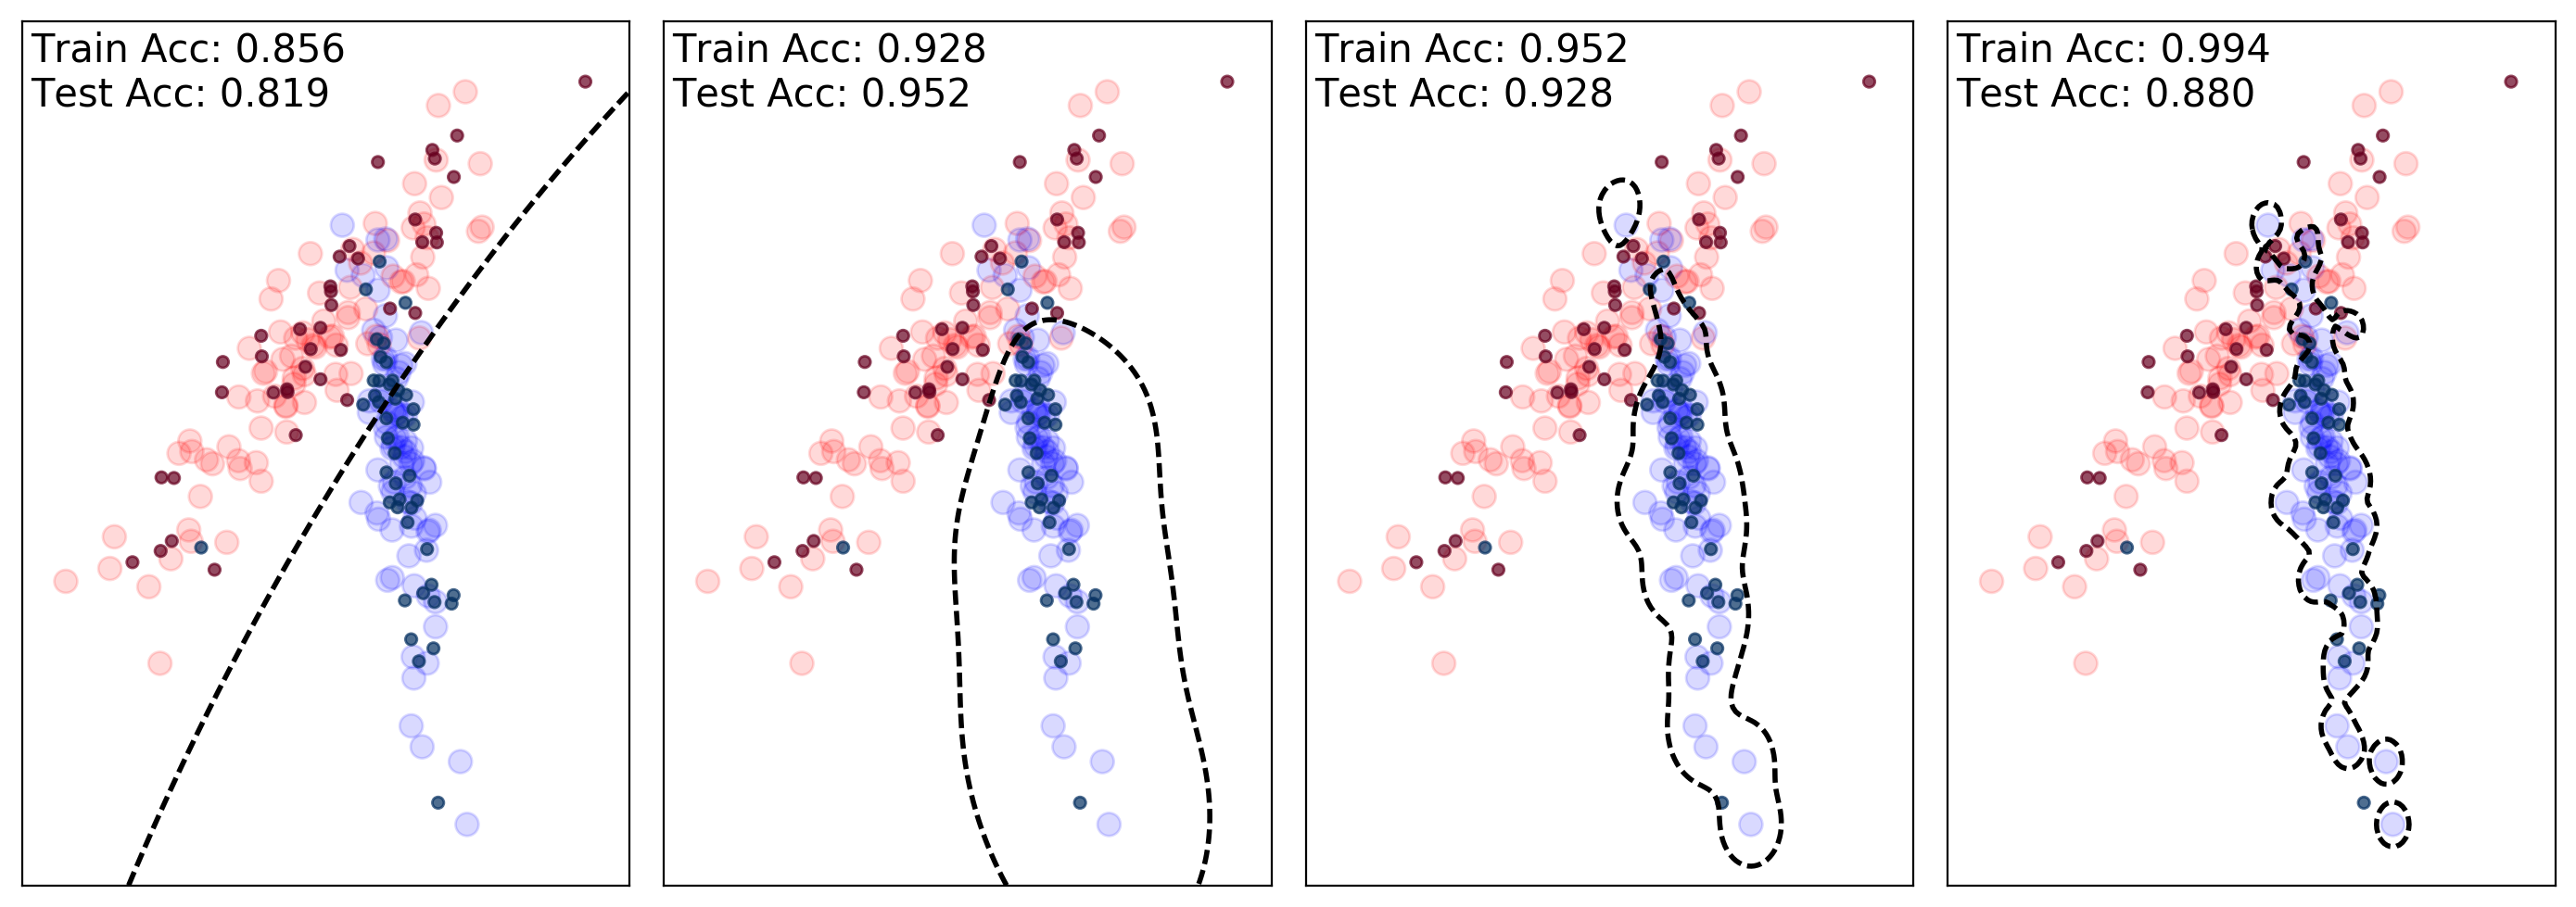

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# create colours for plotting
clrs2 = plt.cm.RdBu
clrs2_light = ListedColormap(['#FF0000', '#0000FF'])

# utility function to get range of values in a feature matrix
def get_range(X):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    return x_min, x_max, y_min, y_max

# create a dataset
clf_X, clf_y = make_classification(n_samples=250, n_features=2, random_state=7,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=0.5)
x_min, x_max, y_min, y_max = get_range(clf_X)

# set up the plot and the training and testing cohorts
figure = plt.figure(figsize=(14, 5))
X_train, X_test, y_train, y_test = train_test_split(
    clf_X, clf_y, test_size=.33, random_state=55)

# get three versions of the same support-vector classifier with different regularization
# parameter values, fit each version to the training cohort
for i in range(4):
    clf = SVC(kernel='rbf', C=(i + 0.8)*0.7 + 1e-5, gamma=i ** 3.6 + 0.01)
    clf.fit(X_train, y_train)
    
    # find the decision boundary of the classifier on the training cohort
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    # get the accuracy of the classifier on the training and testing cohorts
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # plot the dataset and the classifier results
    ax = plt.subplot(1, 4, i+1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.contour(XX, YY, Z, levels=[0],
               colors=['k'], linestyles=['--'], linewidths=2)
    ax.scatter(X_train[:, 0], X_train[:, 1],
               c=y_train, cmap=clrs2_light, s=80, alpha=0.15)
    ax.scatter(X_test[:, 0], X_test[:, 1],
               c=y_test, cmap=clrs2, s=20, alpha=0.7)
    ax.text(XX.min() + .1, YY.max() - .7,
            'Train Acc: ' + ('%.3f' % train_score)
            + '\nTest Acc: ' + ('%.3f' % test_score),
            size=15, horizontalalignment='left')

plt.tight_layout()
plt.show()


Now we can ask: was our OLS model over-fitting in our TP53 example above? It sure looks like it!

In [7]:
# create a training-testing cohort split
train_samps = expr_df.index[:800]
test_samps = expr_df.index[800:]

# fit the OLS model on the training cohort
regr.fit(expr_df.loc[train_samps, target_genes], expr_df.loc[train_samps, 'TP53'])

# calculate model's error on the training and testing cohorts
train_err = mean_squared_error(regr.predict(expr_df.loc[train_samps, target_genes]),
                               expr_df.loc[train_samps, 'TP53'])
test_err = mean_squared_error(regr.predict(expr_df.loc[test_samps, target_genes]),
                              expr_df.loc[test_samps, 'TP53'])

print(pd.DataFrame({'Training Values': expr_df.loc[train_samps[20:25], 'TP53'],
                    'Predicted Values': regr.predict(expr_df.loc[train_samps[20:25], target_genes])}).round(2))
print(pd.DataFrame({'Testing Values': expr_df.loc[test_samps[20:25], 'TP53'],
                    'Predicted Values': regr.predict(expr_df.loc[test_samps[20:25], target_genes])}).round(2))

print('\nOLS Training Error: {:.4f}\nOLS Testing Error: {:.4f}'.format(train_err, test_err))


                  Predicted Values  Training Values
TCGA-A1-A0SP-01A              8.62             8.52
TCGA-A1-A0SQ-01A              9.09             9.10
TCGA-A2-A04N-01A             11.54            11.31
TCGA-A2-A04P-01A              8.83             8.90
TCGA-A2-A04Q-01A              9.70             9.72
                  Predicted Values  Testing Values
TCGA-D8-A1JF-01A              6.32           10.97
TCGA-D8-A1JG-01B              6.15            9.13
TCGA-D8-A1JH-01A             12.82           10.93
TCGA-D8-A1JI-01A             11.87            9.54
TCGA-D8-A1JJ-01A             11.09           11.48

OLS Training Error: 0.0097
OLS Testing Error: 11.7683


We would thus prefer a linear model in which we can adjust the amount of complexity that is allowed, similarly to the SVC model. Ideally, when choosing the coefficients, the model would find an optimal trade-off between how many of them are non-zero and the training error.

Fortunately this model exists and is called **LASSO** (least absolute shrinkage and selection operator, Tibshirani 1996). Lasso, like OLS, tries to minimize the training error, but also tries to minimize the sum of the absolute values of the model coefficients. Thus if we can get the same training error but with fewer non-zero coefficients, Lasso will set the redundant coefficients to zero.

In [8]:
# create a Lasso model, fit it to the training cohort
regr = linear_model.Lasso(alpha=0.01, normalize=True)
regr.fit(expr_df.loc[train_samps, target_genes], expr_df.loc[train_samps, 'TP53'])

# calculate the model's error on the training and testing cohort
train_err = mean_squared_error(regr.predict(expr_df.loc[train_samps, target_genes]),
                               expr_df.loc[train_samps, 'TP53'])
test_err = mean_squared_error(regr.predict(expr_df.loc[test_samps, target_genes]),
                              expr_df.loc[test_samps, 'TP53'])

print(pd.DataFrame({'Training Values': expr_df.loc[train_samps[20:25], 'TP53'],
                    'Predicted Values': regr.predict(expr_df.loc[train_samps[20:25], target_genes])}).round(2))
print(pd.DataFrame({'Testing Values': expr_df.loc[test_samps[20:25], 'TP53'],
                    'Predicted Values': regr.predict(expr_df.loc[test_samps[20:25], target_genes])}).round(2))

print('\nLasso Training Error: {:.4f}\nLasso Testing Error: {:.4f}\n'.format(train_err, test_err))

gene_coefs = pd.Series(regr.coef_, index=target_genes)
print(gene_coefs[gene_coefs != 0].round(4))


                  Predicted Values  Training Values
TCGA-A1-A0SP-01A             10.51             8.52
TCGA-A1-A0SQ-01A             10.51             9.10
TCGA-A2-A04N-01A             10.51            11.31
TCGA-A2-A04P-01A             10.51             8.90
TCGA-A2-A04Q-01A             10.51             9.72
                  Predicted Values  Testing Values
TCGA-D8-A1JF-01A             10.51           10.97
TCGA-D8-A1JG-01B             10.51            9.13
TCGA-D8-A1JH-01A             10.51           10.93
TCGA-D8-A1JI-01A             10.51            9.54
TCGA-D8-A1JJ-01A             10.51           11.48

Lasso Training Error: 0.7556
Lasso Testing Error: 0.6112

Series([], dtype: float64)


We see that the Lasso model does a much better job of minimizing the testing error, also called the **generalization error**. To get a better intuition for why this is the case, let's return to our very first example.

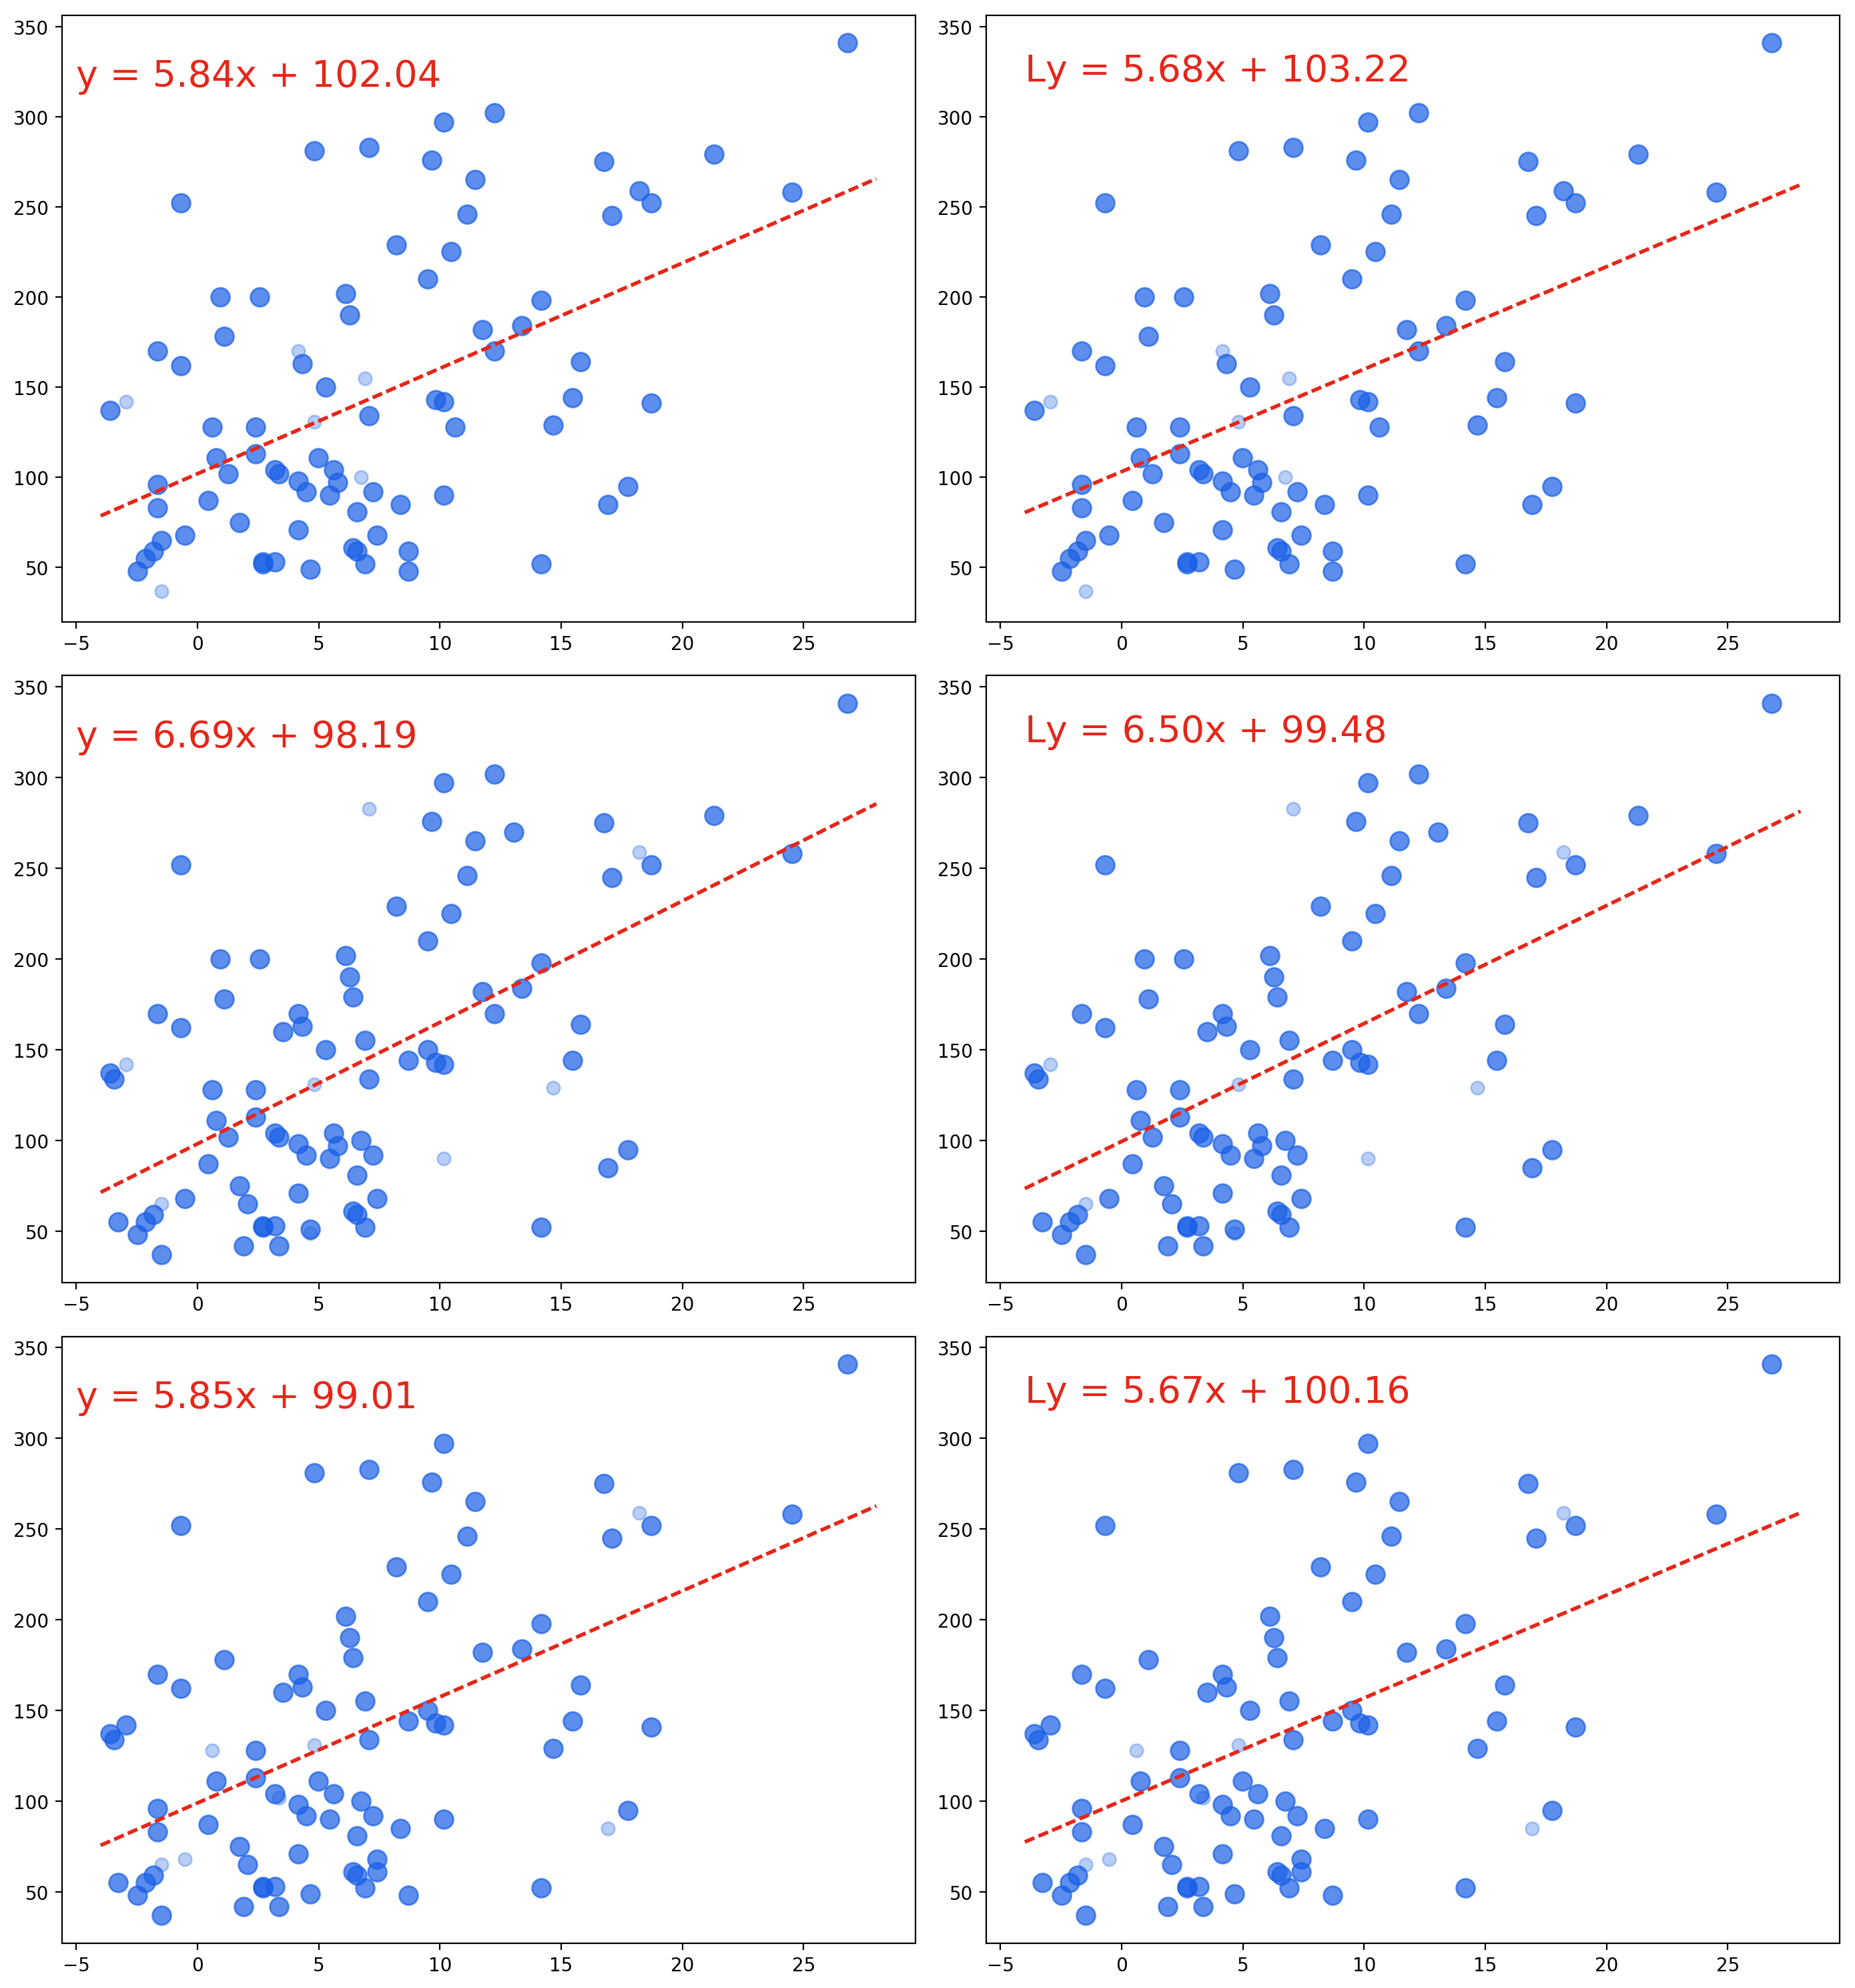

In [9]:
figure = plt.figure(figsize=(14, 15))

input_feats = (diabetes_data.data[20:120, 2] * 150 + 8).reshape(-1, 1)
out_feats = diabetes_data.target[20:120].reshape(-1, 1)

for i in range(3):
    train_samps = np.array(random.sample(list(range(100)), 80))
    test_samps = list(set(range(40)) - set(train_samps))
    
    ax_ols = plt.subplot(3, 2, 2 * i + 1)
    regr = linear_model.LinearRegression()
    regr.fit(input_feats[train_samps], out_feats[train_samps])
    regr_coefs = [regr.coef_[0][0], regr.intercept_[0]]

    # plot the data
    ax_ols.scatter(input_feats[train_samps], out_feats[train_samps],
                   color=plt_clrs[6], s=100, alpha=0.7)
    ax_ols.scatter(input_feats[test_samps], out_feats[test_samps],
                   color=plt_clrs[6], s=50, alpha=0.3)

    # plot the line of best fit found by the model
    x_vals = np.arange(-4, 29)
    y_vals = regr_coefs[0] * x_vals + regr_coefs[1]
    ax_ols.plot(x_vals, y_vals,
                color=plt_clrs[0], linewidth=2, linestyle='--')

    # annotate the plot with the characteristics of the fitted model
    ax_ols.text(s='y = {:.2f}x + {:.2f}'.format(*regr_coefs),
                x=-5, y=317, size=20, color=plt_clrs[0])

    ax_las = plt.subplot(3, 2, 2 * i + 2)
    regr = linear_model.Ridge(alpha=100)
    regr.fit(input_feats[train_samps], out_feats[train_samps])
    regr_coefs = [regr.coef_[0][0], regr.intercept_[0]]

    # plot the data
    ax_las.scatter(input_feats[train_samps], out_feats[train_samps],
                   color=plt_clrs[6], s=100, alpha=0.7)
    ax_las.scatter(input_feats[test_samps], out_feats[test_samps],
                   color=plt_clrs[6], s=50, alpha=0.3)

    # plot the line of best fit found by the model
    x_vals = np.arange(-4, 29)
    y_vals = regr_coefs[0] * x_vals + regr_coefs[1]
    ax_las.plot(x_vals, y_vals,
                color=plt_clrs[0], linewidth=2, linestyle='--')

    # annotate the plot with the characteristics of the fitted model
    ax_las.text(s='Ly = {:.2f}x + {:.2f}'.format(*regr_coefs),
                x=-4, y=320, size=20, color=plt_clrs[0])

plt.tight_layout()
plt.show()


At some point, we have to sacrifice some training error to get fewer non-zero coefficients - this trade-off is controlled by a **regularizarion parameter** which has to be **tuned**. Depending on the implementation of Lasso we are using, this parameter will go by different names, in this particular case "alpha".

In [10]:
# create a training-testing cohort split
train_samps = expr_df.index[:800]
test_samps = expr_df.index[800:]

def test_alpha(alpha_val):
    regr = linear_model.Lasso(alpha=alpha_val, normalize=True)
    regr.fit(expr_df.loc[train_samps, target_genes], expr_df.loc[train_samps, 'TP53'])
    
    train_err = mean_squared_error(regr.predict(expr_df.loc[train_samps, target_genes]),
                                   expr_df.loc[train_samps, 'TP53'])
    test_err = mean_squared_error(regr.predict(expr_df.loc[test_samps, target_genes]),
                                  expr_df.loc[test_samps, 'TP53'])
    
    return train_err, test_err

test_df = pd.DataFrame.from_dict({alph: test_alpha(2 ** alph)
                                  for alph in np.linspace(-11, -7, 6).round(3)})
test_df.index=['Train Error', 'Test Error']
test_df.columns.name = 'log2(Alpha Value)'

print(test_df.round(3))


log2(Alpha Value)  -11.0  -10.2  -9.4   -8.6   -7.8   -7.0 
Train Error        0.296  0.410  0.529  0.641  0.711  0.756
Test Error         0.631  0.563  0.541  0.556  0.584  0.611


There are many other ways to control model complexity in linear regression:
- **ridge regression**, like Lasso, but minimizes the sum of coefficient squares
- **elastic net**, which combines the lasso and ridge complexity penalties
- **forward/backward selection**, where we start with a subset of coefficients, then add/remove coefficients one by one to see if they improve model performance
- **Bayesian regression**, where we declare a prior distribution for the coefficients

Before we turn to Bayesian methods, let's take a look at what tuning an elastic net regressor looks like.

In [11]:
def test_pars(alpha_val, ratio_val):
    
    regr = linear_model.ElasticNet(alpha=alpha_val, l1_ratio=ratio_val, normalize=True)
    regr.fit(expr_df.loc[train_samps, target_genes], expr_df.loc[train_samps, 'TP53'])
    test_err = mean_squared_error(regr.predict(expr_df.loc[test_samps, target_genes]),
                                  expr_df.loc[test_samps, 'TP53'])
    
    return test_err

test_df = pd.DataFrame.from_dict(
    {rtio: {alph: test_pars(2 ** alph, rtio)
            for alph in np.linspace(-12, -1, 6).round(3)}
     for rtio in np.linspace(0, 1, 5)}
    )

test_df.index.name = 'log2(Alpha Value)'
test_df.columns.name = 'L1 Ratio'

print(test_df.round(3))


/home/exacloud/lustre1/CompBio/miniconda2/envs/precepts/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


L1 Ratio            0.00   0.25   0.50   0.75   1.00
log2(Alpha Value)                                   
-12.0              0.699  0.702  0.714  0.731  0.769
-9.8               0.574  0.565  0.549  0.544  0.547
-7.6               0.539  0.551  0.575  0.589  0.593
-5.4               0.566  0.611  0.611  0.611  0.611
-3.2               0.597  0.611  0.611  0.611  0.611
-1.0               0.608  0.611  0.611  0.611  0.611


Methods like Lasso minimize an objective function: training error + complexity

The basic idea behind Bayesian models is to describe everything in terms of (visible) data and (hidden or latent) variables, which are linked together using probability distributions. Our goal is to choose values for the latent variables that make the most sense given the data and the distributions we have chosen.

Thus in the case of regression, the data is our input features and our output values, and the latent variables are the coefficients. What should the distributions be?

$
y \sim \mathbf{X}c
$

